# Visualise Sensor Selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
base_path = "/home/jsimon/Documents/thesis/gesture-analysis/data/"
stats_added_base_path = base_path+"transformed/stats_added/all/"

In [4]:
def sensor_accuracy_matrix(results):
    x_axis = []
    y_axis = []
    for r in results:
        n_sens = len(np.where(r['sensors']>0.0)[0])
        val_f1 = r['best_classifier'][1]
        x_axis.append(n_sens)
        y_axis.append(val_f1)
    return x_axis, y_axis

In [5]:
with open( stats_added_base_path+'sensor-selection-rel-1910.pkl', "rb" ) as users_pickle_file:
    results1 = pickle.load(users_pickle_file)

In [6]:
with open( stats_added_base_path+'sensor-selection-rel-765.pkl', "rb" ) as users_pickle_file:
    results2 = pickle.load(users_pickle_file)

In [7]:
with open( stats_added_base_path+'sensor-selection-rel-192.pkl', "rb" ) as users_pickle_file:
    results3 = pickle.load(users_pickle_file)

In [8]:
with open( stats_added_base_path+'sensor-selection-abs-1910.pkl', "rb" ) as users_pickle_file:
    results4 = pickle.load(users_pickle_file)

In [9]:
with open( stats_added_base_path+'sensor-selection-abs-765.pkl', "rb" ) as users_pickle_file:
    results5 = pickle.load(users_pickle_file)

In [10]:
 with open( stats_added_base_path+'sensor-selection-abs-192.pkl', "rb" ) as users_pickle_file:
    results6 = pickle.load(users_pickle_file)

In [11]:
sam1 = sensor_accuracy_matrix(results1)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [12]:
sam2 = sensor_accuracy_matrix(results2)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [13]:
sam3 = sensor_accuracy_matrix(results3)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [14]:
sam4 = sensor_accuracy_matrix(results4)

In [15]:
sam5 = sensor_accuracy_matrix(results5)

In [16]:
sam6 = sensor_accuracy_matrix(results6)

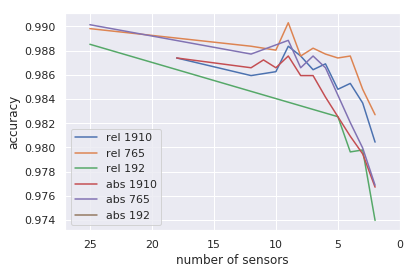

In [86]:
sns.set(color_codes=True)
plt.plot(sam1[0], sam1[1], label='rel 1910')
plt.plot(sam2[0], sam2[1], label='rel 765')
plt.plot(sam3[0], sam3[1], label='rel 192')
plt.plot(sam4[0], sam4[1], label='abs 1910')
plt.plot(sam5[0], sam5[1], label='abs 765')
plt.plot(sam6[0], sam6[1], label='abs 192')
plt.xlim(27, 0)
plt.legend()
plt.xlabel('number of sensors')
plt.ylabel('accuracy')
plt.show()

## Sensor selection for subsets

In [ ]:
setnum = 0

In [ ]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv3-abs.pkl', "rb" ) as users_pickle_file:
    res1set1 = pickle.load(users_pickle_file)

In [ ]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv2-abs.pkl', "rb" ) as users_pickle_file:
    res2set1 = pickle.load(users_pickle_file)

In [349]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfe-abs.pkl', "rb" ) as users_pickle_file:
    res3set1 = pickle.load(users_pickle_file)

In [350]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv3-rel.pkl', "rb" ) as users_pickle_file:
    res4set1 = pickle.load(users_pickle_file)

In [351]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv2-rel.pkl', "rb" ) as users_pickle_file:
    res5set1 = pickle.load(users_pickle_file)

In [352]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfe-rel.pkl', "rb" ) as users_pickle_file:
    res6set1 = pickle.load(users_pickle_file)

In [245]:
sam1 = sensor_accuracy_matrix(res1set1)
sam2 = sensor_accuracy_matrix(res2set1)
sam3 = sensor_accuracy_matrix(res3set1)
sam4 = sensor_accuracy_matrix(res4set1)
sam5 = sensor_accuracy_matrix(res5set1)
sam6 = sensor_accuracy_matrix(res6set1)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


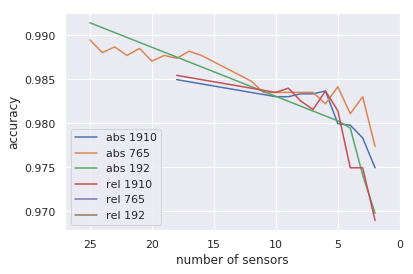

In [246]:
plt.plot(sam1[0], sam1[1], label='abs 1910')
plt.plot(sam2[0], sam2[1], label='abs 765')
plt.plot(sam3[0], sam3[1], label='abs 192')
plt.plot(sam4[0], sam4[1], label='rel 1910')
plt.plot(sam5[0], sam5[1], label='rel 765')
plt.plot(sam6[0], sam6[1], label='rel 192')
plt.xlim(27, 0)
plt.legend()
plt.xlabel('number of sensors')
plt.ylabel('accuracy')
plt.show()

In [247]:
sam1[0]

[18, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [248]:
np.mean(sam1[1])

0.9814419657290656

In [296]:
runs_31g = [results1,results2,results3,results4,results5,results6]
runs_31g_abs = [results4,results5,results6]
runs_31g_rel = [results1,results2,results3]

In [353]:
runs = [res1set1, res2set1, res3set1, res4set1, res5set1, res6set1]
runs_abs = [res1set1, res2set1, res3set1]
runs_rel = [res4set1, res5set1, res6set1]

In [298]:
def find_results_for(num_sensors, runs):
    results = []
    for r in runs:
        for step in r:
            n_sens = len(np.where(step['sensors']>0.0)[0])
            if n_sens <= num_sensors:
                results.append(step)
                break
    return results

In [299]:
def collect_sensor_configurations(results):
    sensors = []
    for r in results:
        config = np.array(r['sensors']>0.0).astype(np.int)
        sensors.append(config)
    return sensors

In [375]:
def sensor_agreement_at(num_sensors, runs):
    results = find_results_for(num_sensors, runs)
    sensors = collect_sensor_configurations(results)
    agree = and_all(sensors)
    disagree = xor_all(sensors)
    n_agree = np.count_nonzero(agree)
    n_all = np.count_nonzero(disagree)
    if n_all == 0:
        return 0.0
    return n_agree / n_all
    #n_disagree = np.count_nonzero(sensors)
    #if (n_agree + n_disagree) == 0:
    #    return 0.0
    #return n_agree / (n_agree + n_disagree)

In [365]:
c = find_results_for(7, runs)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [366]:
s = collect_sensor_configurations(c)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [367]:
np.count_nonzero(and_all(s))

2

In [368]:
len(s)

5

In [369]:
sensor_agreement_at(27, runs)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


0.72

In [376]:
y = []
x = []
for i in range(26):
    agreement = sensor_agreement_at(27-i, runs_31g)
    #print(agreement, 27-i)
    x.append(27-i)
    y.append(agreement)

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


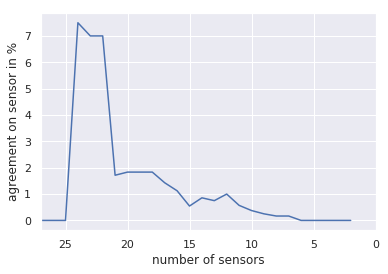

In [377]:
plt.plot(x, y)
plt.xlim(27, 0)
#plt.legend()
plt.xlabel('number of sensors')
plt.ylabel('agreement on sensor in %')
plt.show()

In [101]:
test = [np.array([True, True]), np.array([False, True])]

In [102]:
test

[array([ True,  True]), array([False,  True])]

In [ ]:
numpy.sum(boolarr)
numpy.count_nonzero(boolarr)

In [107]:
def and_all(vec):
    if len(vec) < 2:
        return None
    res = np.logical_and(vec[0], vec[1])
    for v in vec[2:]:
        res = np.logical_and(res, v)
    return res

def xor_all(vec):
    if len(vec) < 2:
        return None
    res = np.logical_xor(vec[0], vec[1])
    for v in vec[2:]:
        res = np.logical_xor(res, v)
    return res

In [113]:
t = xor_all(test)

In [114]:
t

array([ True, False])

In [115]:
np.count_nonzero(t)

1